In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
X = np.load('X.npy')
y_in = np.load('y.npy')
Y= y_in.flatten()

In [4]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='softmax')
                    ])

In [5]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [6]:
model.compile(loss= SparseCategoricalCrossentropy())
model.fit(X,Y, epochs=100)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8106
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6841
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4599
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3708
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3080
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3020
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2550
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2284
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2147
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2252
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1960
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1942
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1819
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1505
Epoch 15/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1

In [7]:
split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

In [ ]:
# Mezclar los datos antes de dividirlos
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X_shuffled = X[indices]
y_shuffled = Y[indices]

# Dividir los datos
X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]

In [10]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8815 - loss: 0.4147 - val_accuracy: 0.8570 - val_loss: 0.4765
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8784 - loss: 0.4014 - val_accuracy: 0.8530 - val_loss: 0.4732
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8838 - loss: 0.4033 - val_accuracy: 0.8650 - val_loss: 0.4615
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8952 - loss: 0.3805 - val_accuracy: 0.8670 - val_loss: 0.4628
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8924 - loss: 0.3825 - val_accuracy: 0.8660 - val_loss: 0.4510
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8939 - loss: 0.3767 - val_accuracy: 0.8680 - val_loss: 0.4477
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8914 - loss: 0.3673 - val_accuracy: 0.8710 - val_loss: 0.4419
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8981 - loss: 0.3513 - val_accuracy: 0.

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\n Precision en el conjunto de prueba: {test_accuracy:.4f}")

predictions = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8418 - loss: 0.4585

 Precision en el conjunto de prueba: 0.8710
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


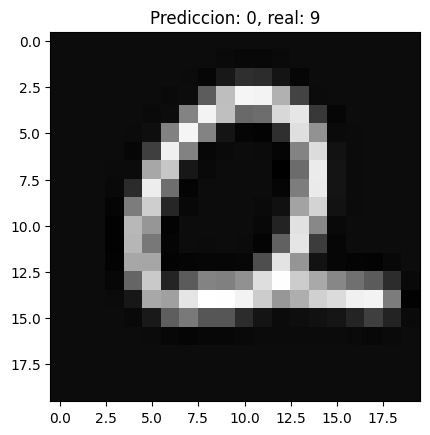

In [57]:
import matplotlib.pyplot as plt

index = np.random.randint(0, len(X_test))
imge = X_test[index].reshape(20, 20)

plt.imshow(imge, cmap='gray')
plt.title(f"Prediccion: {np.argmax(predictions[index])}, real: {y_test[index]}")
plt.show()